<img src="../imgs/ML.jpg" style="width:1000px;">

# <center> 05. Machine learning: an introduction! </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *

%matplotlib inline

# Regression

   - The regression is the problem of predicting a continuous quantity output for an example



see dataset description: http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise

- airfoil self-noise: Ruido aerodinámico
- was processed by NASA
- Features: frequency, angle of attack, sound level (press) in decibels

In [2]:
d = pd.read_csv("../data/airfoil_self_noise.dat.gz")
print d.shape
d.head()

(1503, 6)


,freq,angle,chord,vel,suc,pres
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


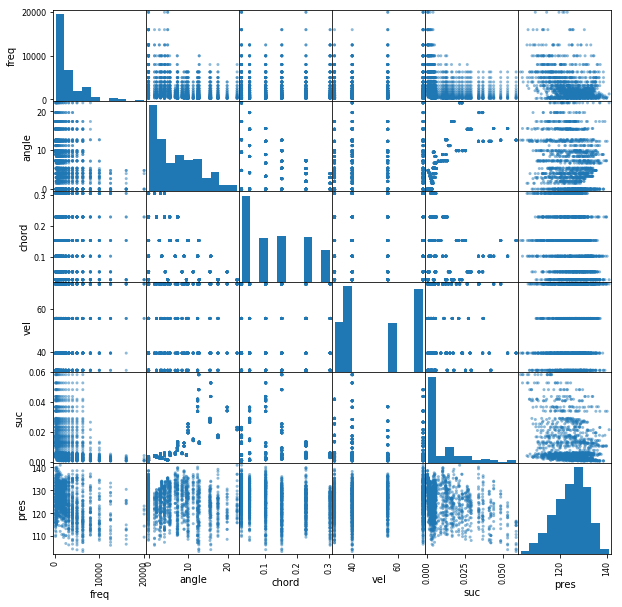

In [3]:
pd.plotting.scatter_matrix(d, figsize=(10,10));

same workflow, observe performance metric must be different for regression. is result acceptable??

In [4]:
X = d.values[:,:-1]
y = d.values[:,-1]

X = d.values[:,[0,1,2,4,5]]
y = d.values[:,-3]

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
est = DecisionTreeRegressor()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print "MSE %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

MSE 158.295 (+/- 42.17941)


In [7]:
from sklearn.svm import SVR
est = SVR()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print "MSE %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

MSE 307.175 (+/- 36.90261)


let's see SVR result more in detail. observe that whe training with less data performace drops. will use permutations to take a random half.

In [8]:
n = len(d)/2
est = SVR()
perm = np.random.permutation(len(d))

Xtr, ytr = X[perm[:n]], y[perm[:n]]
Xts, yts = X[perm[n:]], y[perm[n:]]

est.fit(Xtr, ytr)
print "MSE %.3f"% mean_squared_error(yts, est.predict(Xts))

MSE 305.345


Text(0.5,1,u'showing only some random 40 test elements (BLACK line is error)')

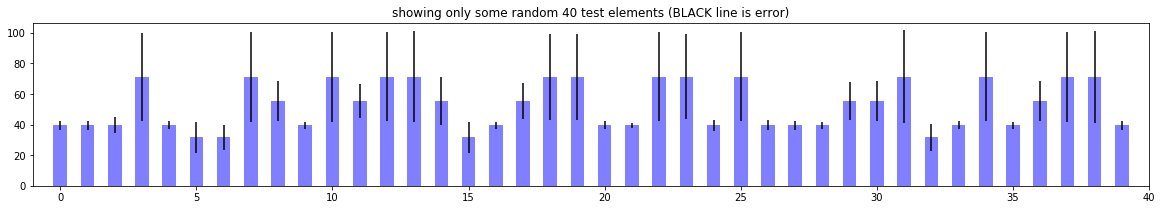

In [9]:
plt.figure(figsize=(20,3))
preds = est.predict(Xts)
errs  = np.abs(yts - preds)
perm = np.random.permutation(range(len(yts)))[:40]
plt.bar(range(len(perm)), yts[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))

finally, let's see the effect of increasing data

In [11]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,11)
    for nfolds in nfolds_range:
        print nfolds,
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

2 3 4 5 6 7 8 9 10


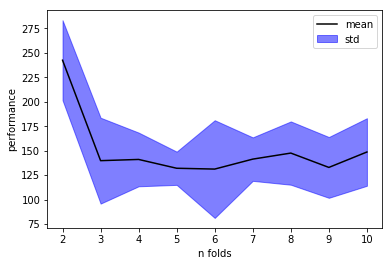

In [15]:
show_curve(DecisionTreeRegressor())

2 3 4 5 6 7 8 9 10


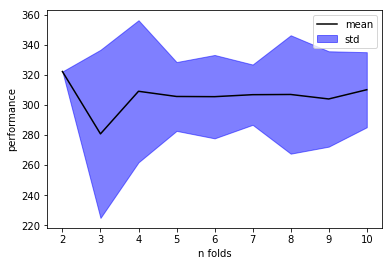

In [16]:
show_curve(SVR())


2 3 4 5 6 7 8 9 10


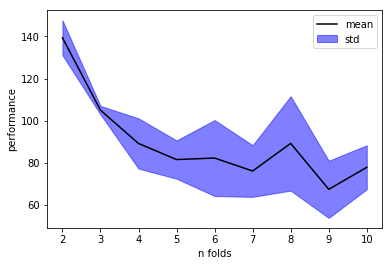

In [21]:
from sklearn.ensemble import RandomForestRegressor
show_curve(RandomForestRegressor())

## <span style="color:orange">student</span>: 

Try to explore the regression methodology in a new dataset. For instance explore **DIABETES** dataset.

- Which is the task to solve?
- Which are the features?
- How is the performance of the implemented methods?


In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()

print diabetes.DESCR

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

# References

[1] airfoil self-noise: https://www.neuraldesigner.com/learning/examples/airfoil_self_noise_prediction

[2] Metrics in regression: https://www.kaggle.com/learn-forum/52081



---
# <center> Thanks! </center>